<a href="https://colab.research.google.com/github/suryapratapsinh/LGMVIP--DataScience-Task-2/blob/main/task_2_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suryapratapsinh Thakor**

# **Data Science Inter at LetsGrowMore**

# **Task-2  Stock prize prediction**

# import libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



# Load the Training Dataset

In [ ]:

df=pd.read_csv("NSE-TATAGLOBAL.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

# use the open stock price column to train your model

In [ ]:
training_set = df.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]
(2035, 1)


# Normalizing the dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
scaled_trainingset= scaler.fit_transform(training_set)
scaled_trainingset

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

# creating x_train and y_train data structures

In [ ]:
x_train = []
y_train = []

for i in range(60,1258):
  x_train.append(scaled_trainingset[i-60:i, 0])
  y_train.append(scaled_trainingset[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)




# Reshape the data

In [ ]:
X_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

X_train.shape

(1198, 60, 1)

# Building the model by importing crucial libraries and adding diffrent layers to LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1],1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

# Fitting Model

In [ ]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')
regressor.fit(x_train , y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 132ms/step - loss: 0.0170
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0026
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0023
Epoch 4/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0024
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0020
Epoch 6/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0018
Epoch 7/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0018
Epoch 8/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0017
Epoch 9/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0014
Epoch 10/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0013
Epoch 11/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0013
Epoch 12/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0014
Epoch 13/100

# Extract the actual stock prices

In [ ]:
dataset_test = pd.read_csv("NSE-TATAGLOBAL.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

# preparing input for the Model

In [ ]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


# predicting the values for stock prices

In [ ]:
train_stock_price = regressor.predict(x_train)
test_stock_price = regressor.predict(x_test)




predicted_stock_price = scaler.inverse_transform(train_stock_price)
predicted_stock_price = scaler.inverse_transform(test_stock_price)


1/1 [==============================] - 0s 43ms/step


# plotting the actual price and predicted price for dataset

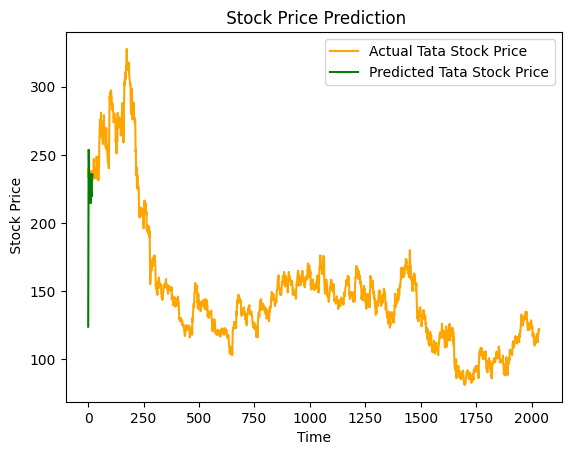

In [ ]:
plt.plot(actual_stock_price, color = 'orange' , label = 'Actual Tata Stock Price')
plt.plot(predicted_stock_price, color = 'green' , label = 'Predicted Tata Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()